In [12]:
# random_chance_baseline.py
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [13]:
# Load the dataset with clustering results
data_path = '../optics_new/clustered_shots_with_predictions.csv'
shots_data = pd.read_csv(data_path)

In [14]:
# Generate random predictions for shot_place based on its distribution
np.random.seed(42)
unique_shot_places = shots_data['shot_place'].unique()
random_predictions = np.random.choice(unique_shot_places, size=len(shots_data))

In [15]:
# Add random predictions to the dataset
shots_data['random_shot_place'] = random_predictions

In [16]:
# Compute accuracy
random_accuracy = accuracy_score(shots_data['shot_place'], shots_data['random_shot_place'])
print(f"Accuracy of random chance prediction: {random_accuracy:.4f}")

Accuracy of random chance prediction: 0.0821


<Figure size 1000x800 with 0 Axes>

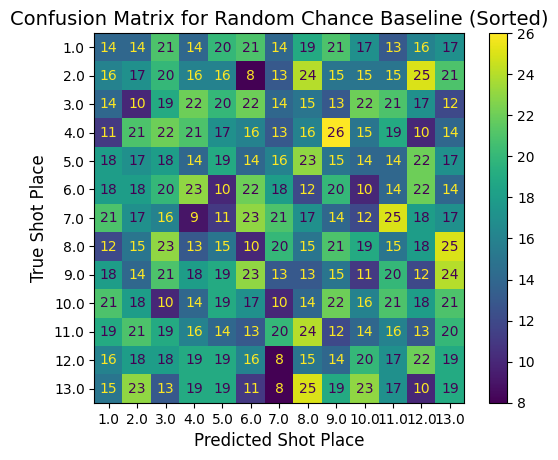

In [17]:
# Sort the unique shot places
sorted_unique_shot_places = np.sort(unique_shot_places)

# Recompute the confusion matrix with sorted labels
cm_sorted = confusion_matrix(shots_data['shot_place'], shots_data['random_shot_place'], labels=sorted_unique_shot_places)
disp_sorted = ConfusionMatrixDisplay(confusion_matrix=cm_sorted, display_labels=sorted_unique_shot_places)

# Plot the sorted confusion matrix
plt.figure(figsize=(10, 8))
disp_sorted.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix for Random Chance Baseline (Sorted)', fontsize=14)
plt.xlabel('Predicted Shot Place', fontsize=12)
plt.ylabel('True Shot Place', fontsize=12)
plt.grid(False)
plt.show()

In [18]:
# Summary of results
print(f"Random chance accuracy: {random_accuracy:.4f}")

Random chance accuracy: 0.0821
